In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, t, binom
%matplotlib inline

import sympy as sp
from sympy import init_printing
init_printing()  

In [2]:
x = sp.Symbol('x')
a = sp.Symbol('a', constant = True)
b = sp.Symbol('b', constant = True)
f = a*x + b
g = (x - b)/a

In [3]:
f

In [4]:
g

In [5]:
def graficas_inversas(pendiente=1,ordenada=0): 
    x = sp.Symbol('x')
    a = sp.Symbol('a', constant = True)
    b = sp.Symbol('b', constant = True)
    
    f = a*x + b
    g = (x - b)/a
    
  
    h_1 = f.subs(a,pendiente).subs(b,ordenada)
    h_2 = g.subs(a,pendiente).subs(b,ordenada)
    
    p_1 = sp.plot(h_1, show=False, xlim=(-5,5),ylim=(-5,5))
    p_2 = sp.plot(h_2, show=False)
    p_3 = sp.plot(x, show = False)
    
    
    p_1.append(p_2[0])
    p_1.append(p_3[0])
    return p_1.show()

In [6]:
def evaluaciones(pendiente = 1, ordenada = 0):
    x = sp.Symbol('x')
    a = sp.Symbol('a', constant = True)
    b = sp.Symbol('b', constant = True)
    
    f = a*x + b
    g = (x - b)/a

    return f.subs(a,pendiente).subs(b,ordenada), g.subs(a,pendiente).subs(b,ordenada)

In [7]:
evaluaciones(1/5,1/5)

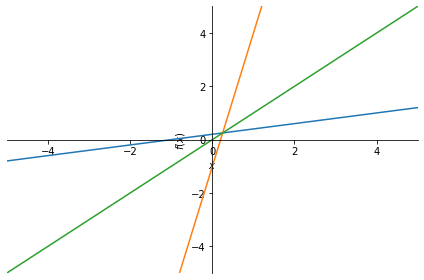

In [8]:
graficas_inversas(1/5,1/5)

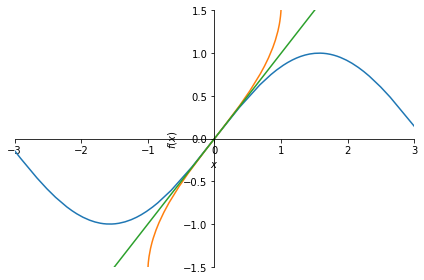

In [9]:
h_1 = sp.sin(x)
h_2 = sp.asin(x)

p_1 = sp.plot(h_1, show=False, xlim=(-3,3),ylim=(-1.5,1.5))
p_2 = sp.plot(h_2, show=False)
p_3 = sp.plot(x, show = False)

p_1.append(p_2[0])
p_1.append(p_3[0])

p_1.show()

In [10]:
def estimacion_por_normal(media_poblacional, desviacion_estandar,nivel_de_confianza, tam_muestra):
    '''
    las siguientes lineas son los limites del intervalo de confianza
    '''
    z_alpha_medios = abs(norm.ppf((1-nivel_de_confianza)/2))
    
    lim_infe = media_poblacional - z_alpha_medios*desviacion_estandar/np.sqrt(tam_muestra)
    lim_sup = media_poblacional + z_alpha_medios*desviacion_estandar/np.sqrt(tam_muestra)
    #Regresamos el intervalo de confianza.
    return lim_infe, lim_sup

In [11]:
media_poblacional = 1550
desviacion_estandar = 30
nivel_de_confianza = .95
tam_muestra = 50

estimacion_por_normal(1550,30,.95,50)

In [12]:
norm.interval(.95, 1550, 30/np.sqrt(50))    

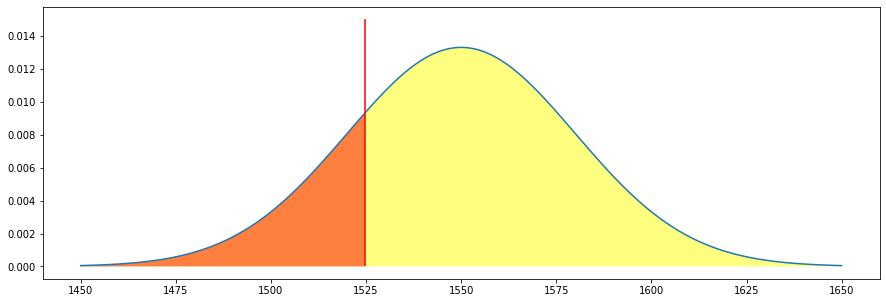

In [13]:
# Rangos de las funciones
x = np.arange(1450,1650,.001)
y = norm.pdf(x,loc = 1550, scale=30)

# Cuantil Z_alpha/2
z_1 = norm.ppf((1 -.80), loc = 1550, scale=30)

# Para los colores
x_2 = np.arange(1450,z_1,.001)
y_2 = norm.pdf(x_2, loc = 1550, scale=30)

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(x,y)

ax.fill_between(x,y, facecolor='yellow', alpha=0.5)

ax.fill_between(x_2,y_2, facecolor='red', alpha=0.5)
ax.vlines(z_1, 0, .015, colors='r')
plt.show()

In [14]:
def nivel_de_confianza(probabilidad=.5):
    
    x = np.arange(-4,4,.001)
    
    y = norm.pdf(x)
    
    
    alpa_medios = (1- probabilidad)/2
    z_1 = norm.ppf(alpa_medios)
    z_2 = -z_1
    
    x_2 = np.arange(-3,z_1,.001)
    y_2 = norm.pdf(x_2)

    x_3 = np.arange(z_2,3,.001)
    y_3 = norm.pdf(x_3)

    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(x,y)
    ax.fill_between(x,y, facecolor='yellow', alpha=0.2)
    ax.fill_between(x_2,y_2, facecolor='red', alpha=0.5)

    ax.fill_between(x_3,y_3, facecolor='red', alpha=0.5)

    ax.vlines([z_1, z_2], 0, 1, transform=ax.get_xaxis_transform(), colors='r')

    ax.set_ylim([0,.45])

    return ax



<AxesSubplot:>

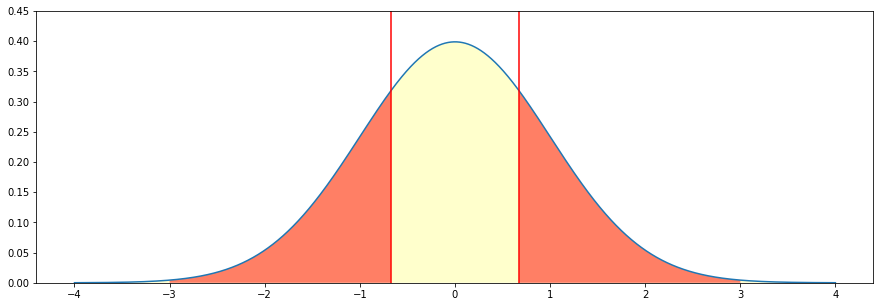

In [15]:
nivel_de_confianza()

<AxesSubplot:>

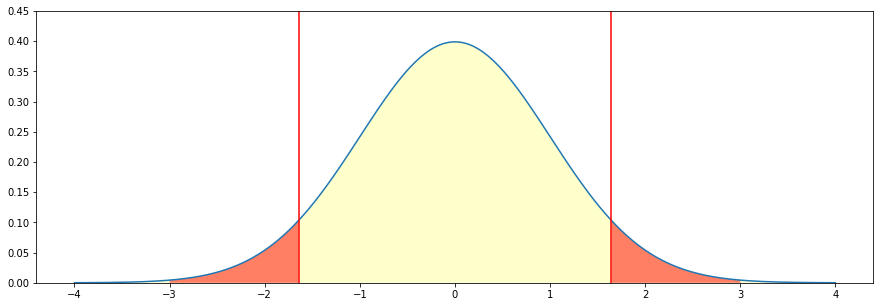

In [16]:
nivel_de_confianza(.90)

<AxesSubplot:>

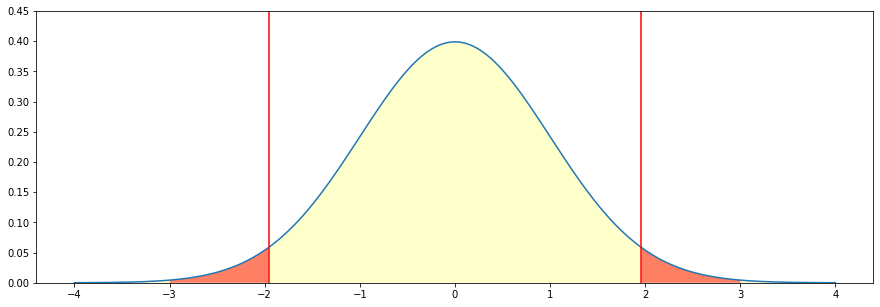

In [17]:
nivel_de_confianza(.95)

<AxesSubplot:>

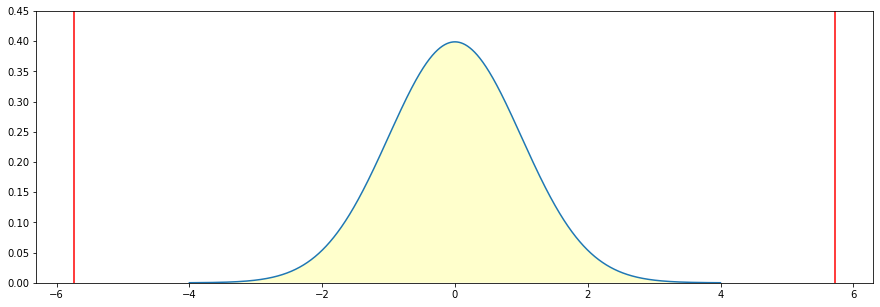

In [51]:
nivel_de_confianza(.99999999)

In [19]:
def area_bajo_la_curva(area=.5):
    
    # Dominio en general
    x = np.arange(-3,3,.001)
    # La campana gaussiana completa
    y = norm.pdf(x)
    
    # El rango del area bajo la curva
    x_2 = np.arange(-3,norm.ppf(area),.001)
    y_2 = norm.pdf(x_2)
    
    z = norm.cdf(x)
    l = norm.ppf(z)
    
    fig, (vax, hax, lax) = plt.subplots(1, 3, figsize=(12, 6))
    
    vax.plot(x,y)
    vax.fill_between(x,y, facecolor = 'gray', alpha = 0.1)
    vax.fill_between(x_2,y_2, facecolor = 'red', alpha = 0.5)

    hax.plot(x,z)
    hax.vlines(norm.ppf(area),0,area, colors='r')
    hax.hlines(area,-3,norm.ppf(area), colors='b')
    hax.plot(norm.ppf(area),area, marker ="o", markersize=8)
    
        
    lax.plot(z,l)
    
    lax.vlines(area,-3,norm.ppf(area), colors='b')
    lax.hlines(norm.ppf(area),0, area, colors='r')
    lax.plot(area,norm.ppf(area), marker ="o", markersize=8)
    return vax, hax



(<AxesSubplot:>, <AxesSubplot:>)

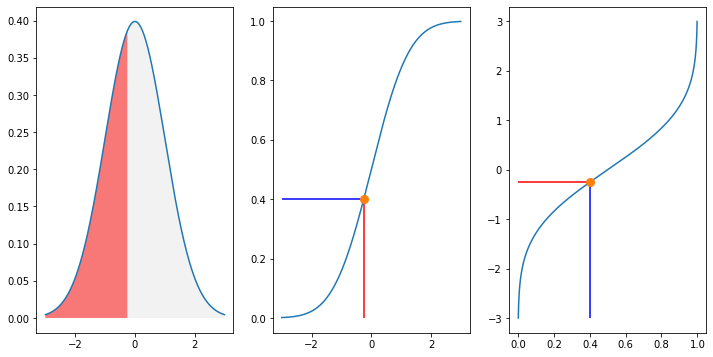

In [20]:
area_bajo_la_curva(.40)

(<AxesSubplot:>, <AxesSubplot:>)

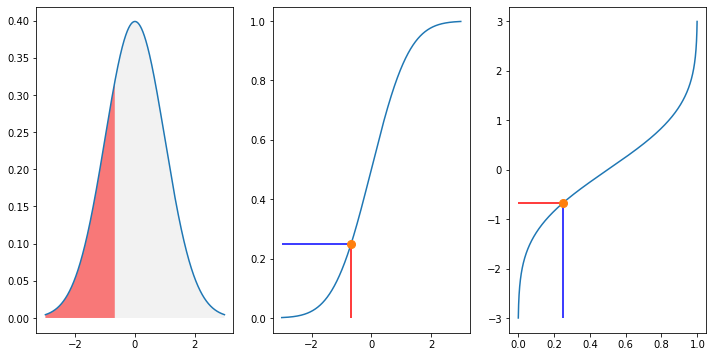

In [21]:
area_bajo_la_curva(.25)

(<AxesSubplot:>, <AxesSubplot:>)

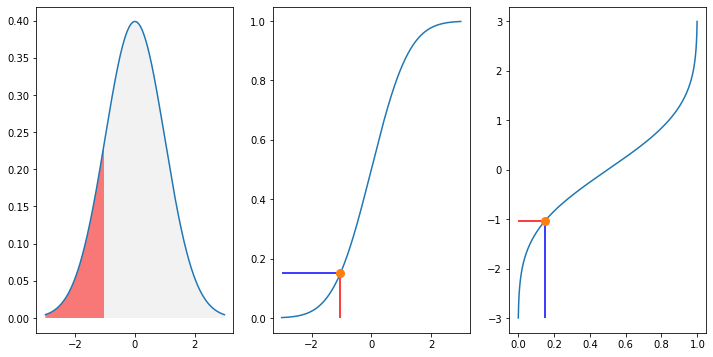

In [22]:
area_bajo_la_curva(.15)

In [23]:
intervalo = norm.interval(.95, 1550, 30/np.sqrt(50))
intervalo

In [24]:
probabiliad = .35
total_alumnos = 1009
observaciones = 390

def estimador_promedio(total= 1009, observaciones=390):
    return (1/total)*observaciones

In [25]:
estimacion = estimador_promedio()   
estimacion

$$\hat{Z} = \frac{\hat{\Theta}- \theta}{\sigma/\sqrt{N}}$$
es $Norm(0,1)$. 

In [26]:
def estadistico(total = 1009, observaciones=390,parametro = .35):
    varianza = parametro*(1-parametro)
    factor = np.sqrt(varianza/total)
    return (estimador_promedio(total, observaciones)-parametro)/factor

In [27]:
estadistico()

In [28]:
est = estadistico()
def regla_de_desicion(nivel_critico = .95, total = 1009, observaciones=390, parametro = .35):
    z_alfa = -norm.ppf(1-nivel_critico)
    
    if z_alfa < est:
        print("Rechar la hipotesis nula")
    else:
        print("Aceptar la hipotesis nula")

In [29]:
regla_de_desicion()

Rechar la hipotesis nula


In [30]:
estimacion = estimador_promedio(total = 150, observaciones=128)   

est = estadistico(total = 150, observaciones = 128, parametro =.9)

desicion = regla_de_desicion()

desicion

Aceptar la hipotesis nula


# Z test
$H_0: \theta = 85$ vs $H_1:\theta <85$

In [31]:
desviacion = 11.6
total_N = 25
estadistica = 80.94
valor_critico = .05 
parametro_theta = 85 

In [32]:
Z_normal = (estadistica - parametro_theta)/(desviacion/np.sqrt(total_N))

zeta_alfa = norm.ppf(valor_critico)

if Z_normal >= zeta_alfa:
    print("Aceptamos la hipotesis nula")
else:
    print("Rechazamos la hipotesis nula")

Rechazamos la hipotesis nula


In [33]:
Z_normal, zeta_alfa

# T test
$H_0: \theta = 120$ vs $H_1:\theta \neq 120$

In [34]:
desviacion = 21.21
total_N = 100
estadistica = 130.1
valor_critico = .05 
parametro_theta = 120 

t_student = (estadistica - parametro_theta)/(desviacion/np.sqrt(total_N))

t_alfa = t.ppf(1-valor_critico/2, df = total_N-1)

p_value = 2*(1-t.cdf(t_student,df=total_N-1) )

if p_value >= valor_critico:
    print("Aceptamos la hipotesis nula")
else:
    print("Rechazamos la hipotesis nula")

Rechazamos la hipotesis nula


In [35]:
p_value, valor_critico

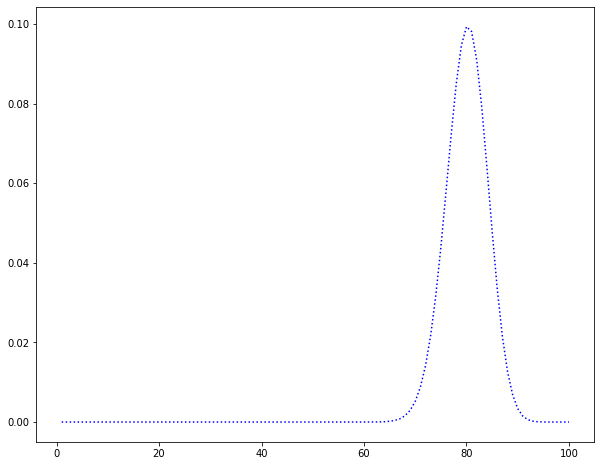

In [36]:
def binomial(probabilidad = .5, lanzamientos=100):
    x = np.arange(1,lanzamientos+1)
    y = binom.pmf(x,lanzamientos,probabilidad)
    fig, ax = plt.subplots(figsize=(10,8))
    ax.plot(x, y, 'b:')
    return plt.show()

binomial(probabilidad = .8)

Se tiene una distribución Bernouli de parámetro $p$. Se desea obtener el intervalo de confianza del $90\%$ para $p$ tal que la longitud del intervalo sea a lo sumo $.05$.¿Qué tamaño de la muestra debe tomarse?

$$ \varepsilon = Z_{\alpha}*\sqrt{ \frac{p'*(1-p')}{n}}$$

In [37]:
def longitud_uno(probabilidad=.90,tam_muestra=10):
    x = -norm.ppf((1-probabilidad)/2)
    longitud_1 = x/np.sqrt(tam_muestra)
    return longitud_1

def error(err=.05, probabilidad=.9,tam_muestra=10):
    x = tam_muestra
    while longitud_uno(tam_muestra= x) > err:
        x+=1
    return x
# 1075
longitud_uno(tam_muestra=1083), error()

In [38]:
def longitud_dos(probabilidad=.90,tam_muestra=10):
    x = -norm.ppf((1-probabilidad)/2)
    longitud_2 = x**2/(tam_muestra + x**2)
    return longitud_2

def error(err=.05, probabilidad=.9,tam_muestra=10):
    x = tam_muestra
    while longitud_dos(tam_muestra= x) > err:
        x+=1
    return x
# 1075
longitud_dos(tam_muestra=52), error()

las mediciones de lso numeros de cigarros fumados al dia por un grupo de diez fumadores es:

In [39]:
datos = [5,10,3,4,5,8,20,4,1,10]
media_muestral = np.mean(datos)
media_muestral

Con las hipetesis $H_0: \mu=10$ y $H_1: \mu <10$ para estimar la media. Se tiene ademas, 

In [40]:
sigma = 1.2
factor = sigma/np.sqrt(len(datos))

nivel_de_significancia = .05

In [41]:
Z_estadistico = (media_muestral-10)/factor
Z_estadistico

In [42]:
z_alfa = norm.ppf(nivel_de_significancia)
z_alfa

In [43]:
def region_de_rechazo():
    if Z_estadistico <= z_alfa:
        print("Se rechaza la hipotesis nula")
    else:
        print("Se acepta la hipotesis nula")

In [44]:
region_de_rechazo()

Se rechaza la hipotesis nula


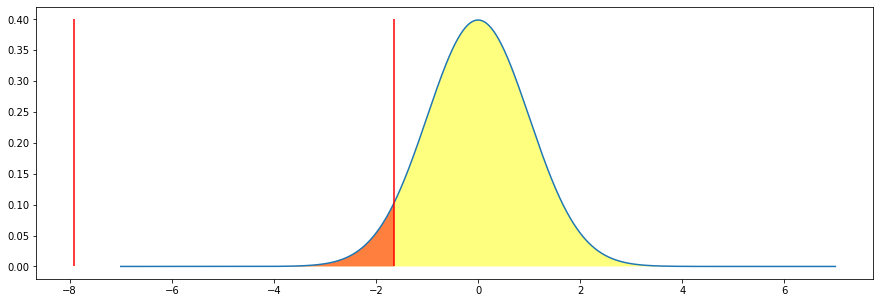

In [45]:
# Rangos de las funciones
x = np.arange(-7,7,.001)
y = norm.pdf(x)

# Cuantil Z_alpha/2
z_1 = norm.ppf((1 -.95))

# Para los colores
x_2 = np.arange(-7,z_1,.001)
y_2 = norm.pdf(x_2,)

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(x,y)

ax.fill_between(x,y, facecolor='yellow', alpha=0.5)

ax.fill_between(x_2,y_2, facecolor='red', alpha=0.5)
ax.vlines(z_alfa, 0, .40, colors='r')
ax.vlines(Z_estadistico, 0, .40, colors='r')
plt.show()

(<AxesSubplot:>, <AxesSubplot:>)

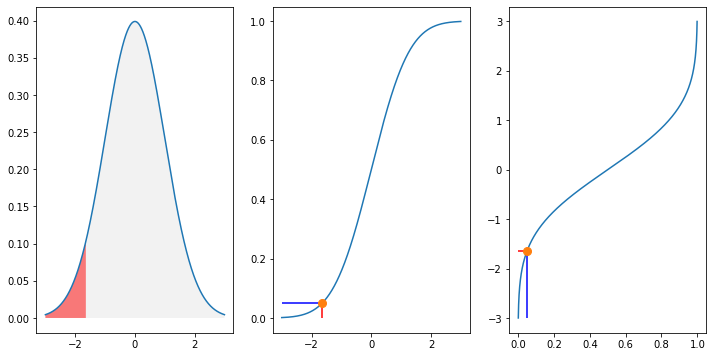

In [46]:
area_bajo_la_curva(.05)

In [47]:
error_tipo_uno = nivel_de_significancia

In [48]:
error_tipo_dos = 1- norm.cdf(z_alfa + (10-media_muestral)/(factor))

In [49]:
error_tipo_uno,error_tipo_dos